In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image
import pylab

# Add the path to the src folder to the python path
sys.path.append(os.path.abspath("../src"))
from optimizer import (
    FistaBT,
    FistaMod,
    FistaCD,
    GreedyFISTA,
    RestartingFISTA,
    OptimizationParams,
)

from problems import tv_problem_2d

import visualization as vis

In [34]:
def load_grayscale_image(path, size=None):
    """Load an image and convert to grayscale numpy array with values in [0,1].
    ↪"""
    img = Image.open(path).convert("L")
    if size:
        img = img.resize(size)
    return np.array(img, dtype=np.float32) / 255.0

In [35]:
def imageplot(f, str="", sbpt=[]):
    """
    Use nearest neighbor interpolation for the display.
    """
    if sbpt != []:
        plt.subplot(sbpt[0], sbpt[1], sbpt[2])
    imgplot = plt.imshow(f, interpolation="nearest", vmin=0, vmax=1)
    imgplot.set_cmap("gray")
    pylab.axis("off")
    if str != "":
        plt.title(str)

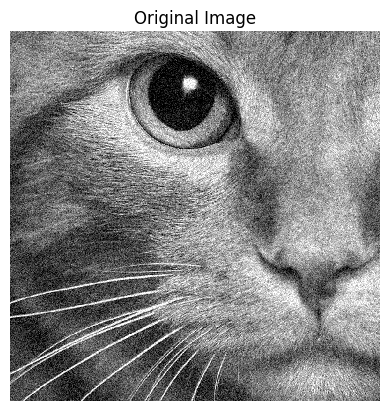

In [36]:
img = load_grayscale_image("../data/cat_noise.png")
imageplot(img, "Original Image", [1, 1, 1])
plt.show()

In [37]:
dim = img.shape  # Dimension of the problem
mu = 0.005  # Regularization parameter
gamma = 0.01  # Step size
x0 = np.random.randn(img.shape[0], img.shape[1])

params = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=gamma,
    x0=x0,
    verbose=False,
    max_iter=1000,
)

In [38]:
tv_problem = tv_problem_2d(img)

# FISTA-BT


In [39]:
fista_bt = FistaBT(params)

In [40]:
x_bt, history_bt = fista_bt.optimize(*tv_problem)

100%|██████████| 1000/1000 [00:22<00:00, 44.10it/s]


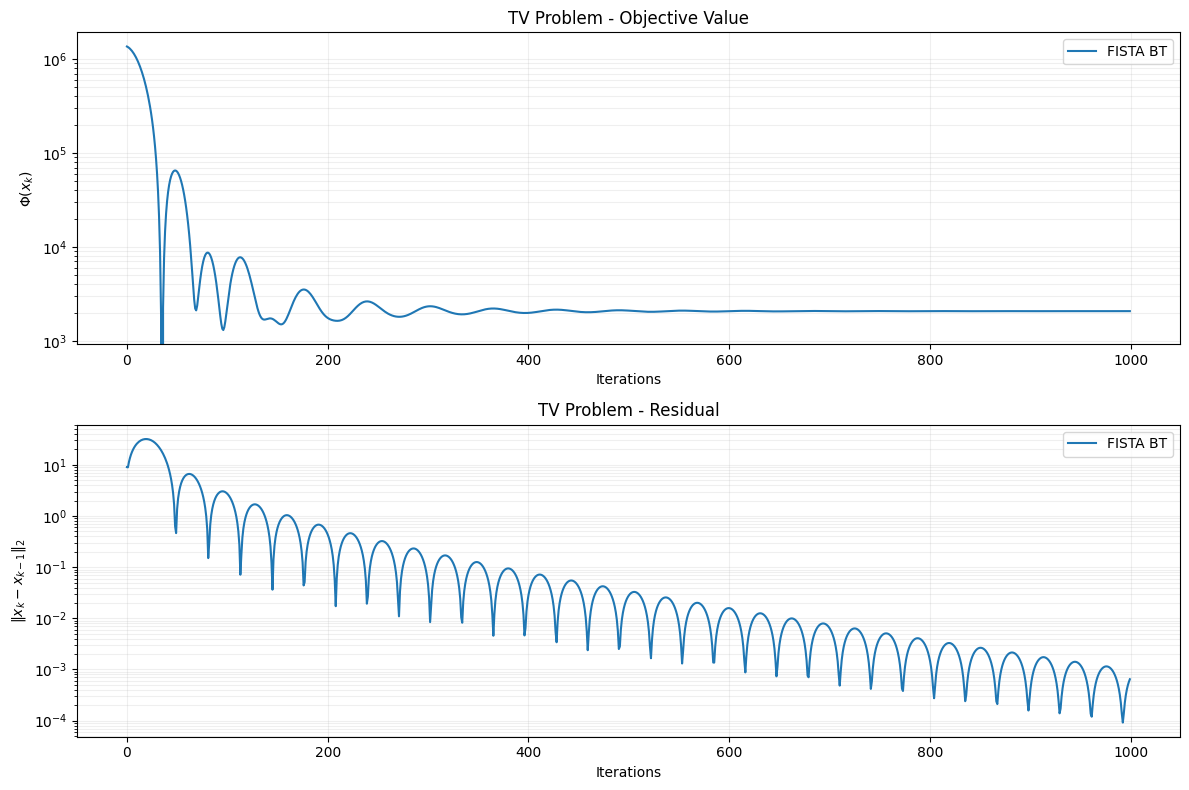

In [41]:
vis.plot_convergence([history_bt], labels=["FISTA BT"], title="TV Problem")

# FISTA-Mod


In [42]:
fista_mod = FistaMod(params, p=1 / 20, q=1 / 2, r=4)

In [43]:
x_mod, history_mod = fista_mod.optimize(*tv_problem)

 48%|████▊     | 478/1000 [00:15<00:17, 29.96it/s]


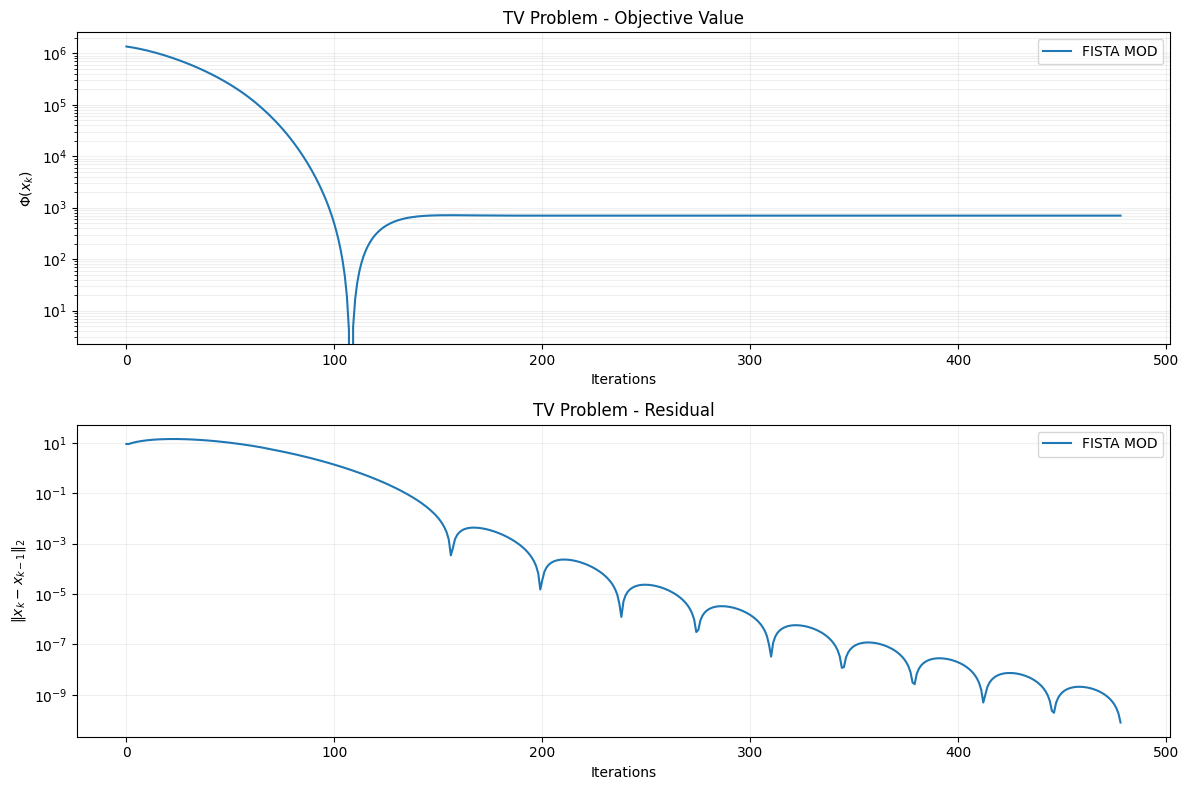

In [44]:
vis.plot_convergence([history_mod], labels=["FISTA MOD"], title="TV Problem")

# Greedy FISTA


In [45]:
params_greedy = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=0.1,
    x0=x0,
    verbose=False,
    max_iter=1000,
)
fista_greedy = GreedyFISTA(params_greedy, S=1, xi=0.96)

In [46]:
x_greedy, history_greedy = fista_greedy.optimize(*tv_problem)

 53%|█████▎    | 533/1000 [03:05<02:42,  2.88it/s]


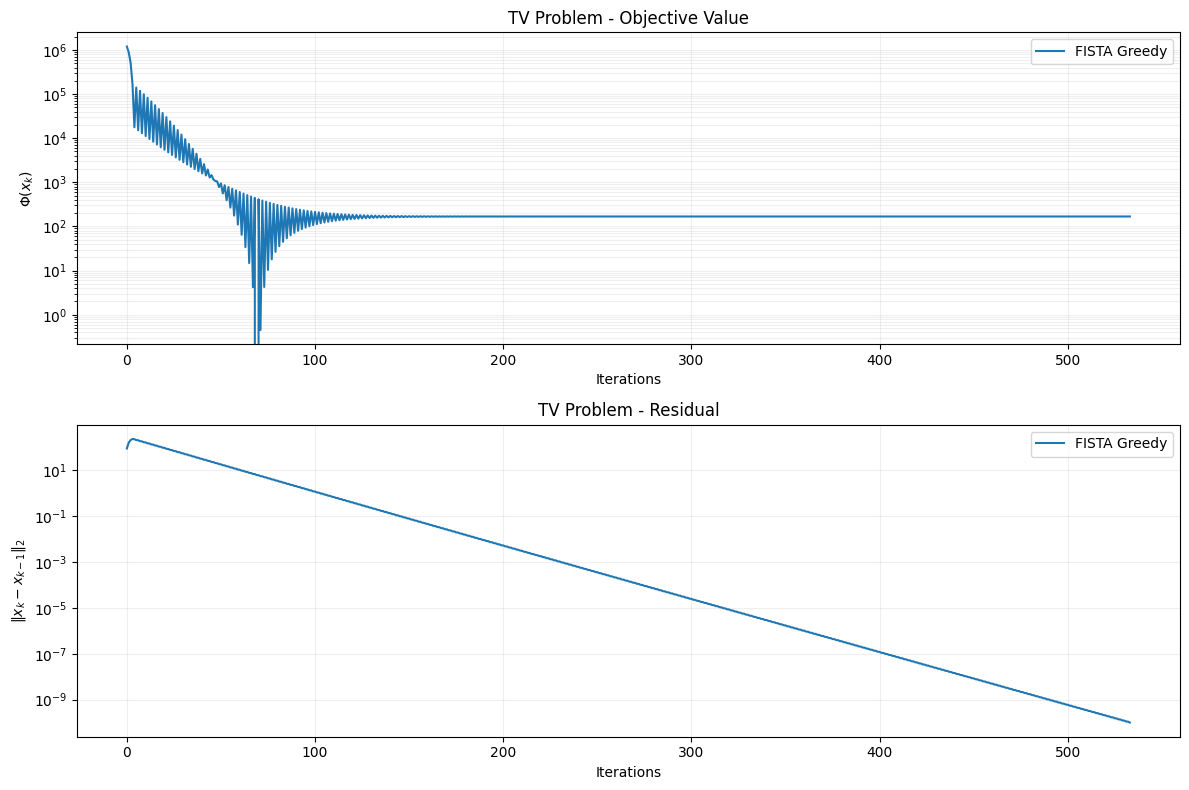

In [47]:
vis.plot_convergence([history_greedy], labels=["FISTA Greedy"], title="TV Problem")

# Rada-FISTA


In [48]:
fista_rada = RestartingFISTA(params, p=1 / 20, q=1 / 2, r=4, xi=0.95)

In [49]:
x_rada, history_rada = fista_rada.optimize(*tv_problem)

 83%|████████▎ | 834/1000 [00:21<00:04, 38.28it/s]


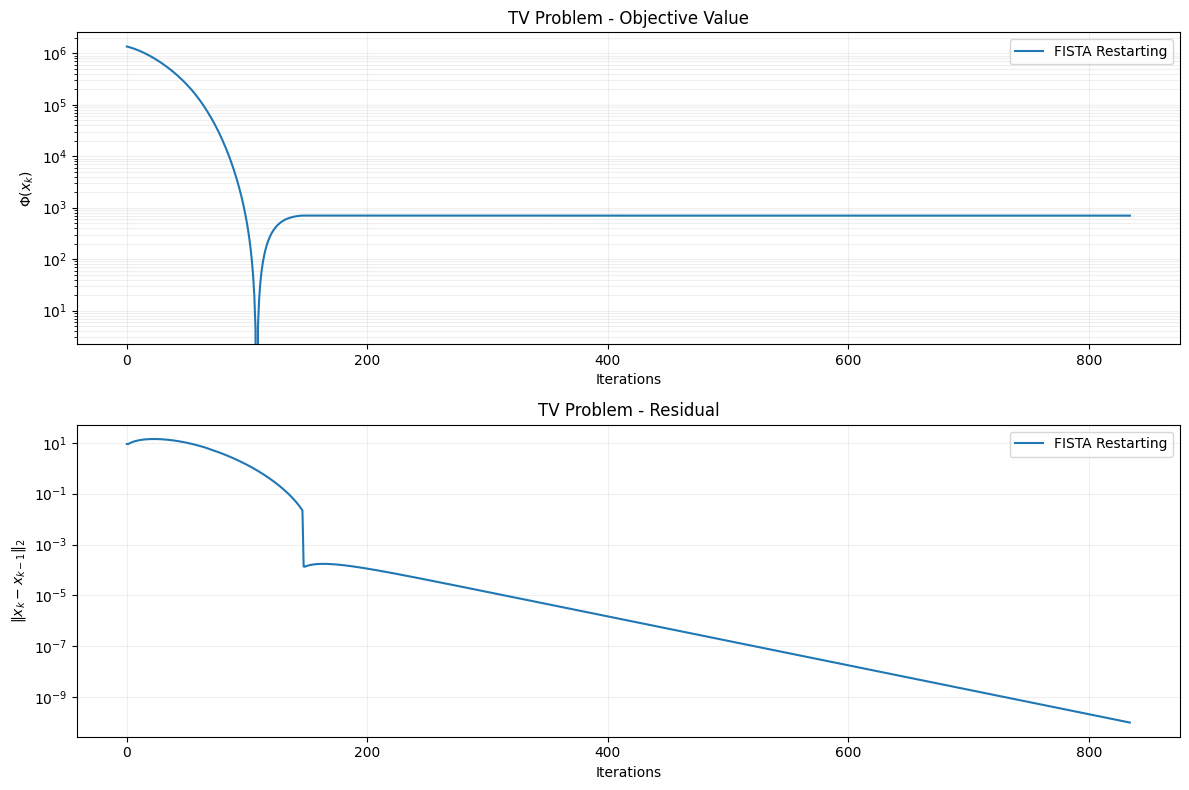

In [50]:
vis.plot_convergence([history_rada], labels=["FISTA Restarting"], title="TV Problem")

# FISTA CD (Lazy Start)


In [51]:
fista_lazy = FistaCD(params, d=40)

In [52]:
x__lazy, history_lazy = fista_lazy.optimize(*tv_problem)

 44%|████▍     | 440/1000 [00:15<00:19, 28.44it/s]


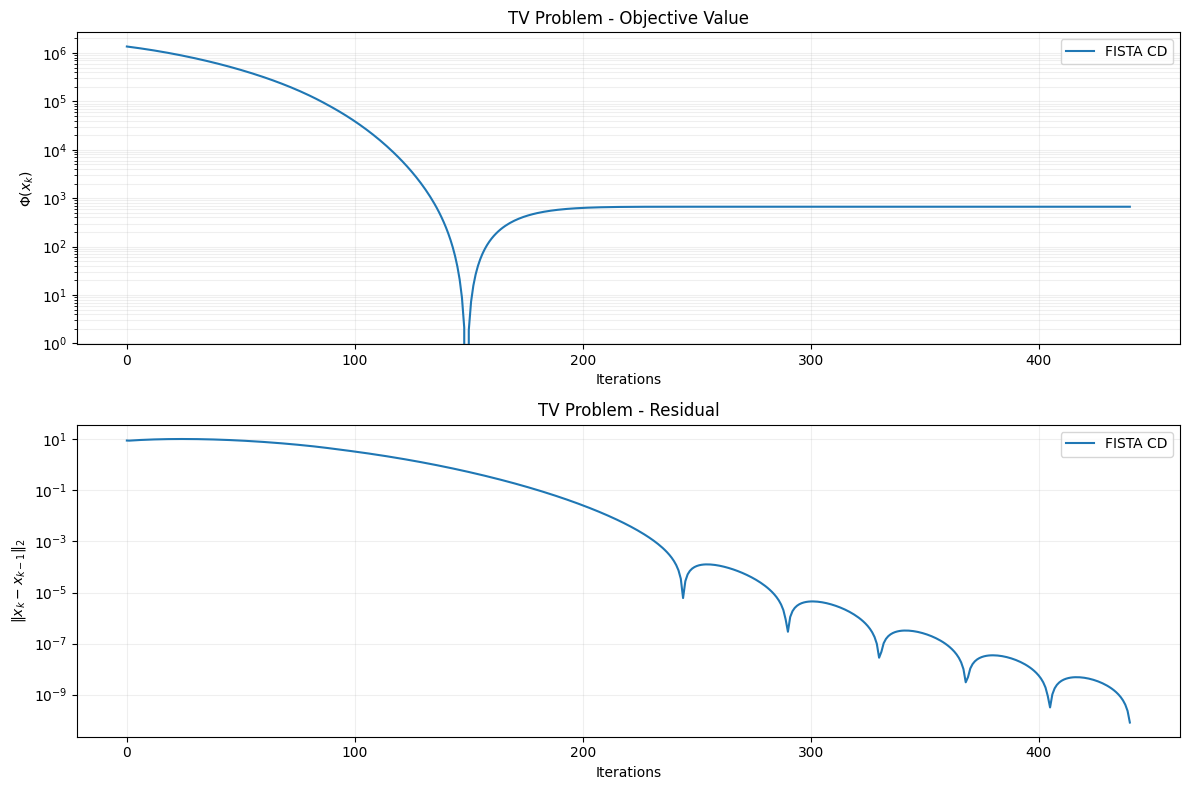

In [53]:
vis.plot_convergence([history_lazy], labels=["FISTA CD"], title="TV Problem")

# Model comparison


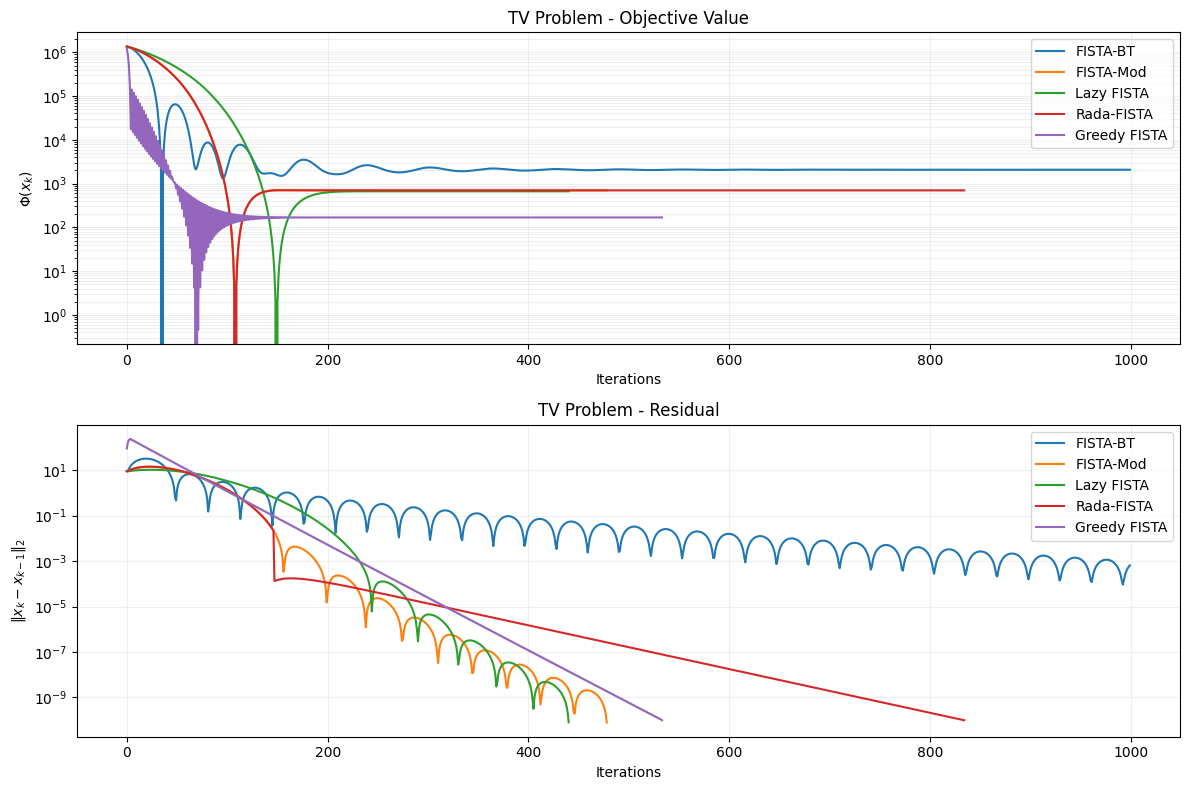

In [54]:
vis.plot_convergence(
    [history_bt, history_mod, history_lazy, history_rada, history_greedy],
    labels=["FISTA-BT", "FISTA-Mod", "Lazy FISTA", "Rada-FISTA", "Greedy FISTA"],
    title="TV Problem",
)

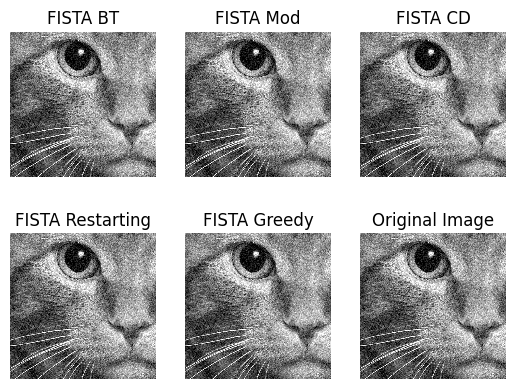

In [55]:
imageplot(x_bt, "FISTA BT", [2, 3, 1])
imageplot(x_mod, "FISTA Mod", [2, 3, 2])
imageplot(x__lazy, "FISTA CD", [2, 3, 3])
imageplot(x_rada, "FISTA Restarting", [2, 3, 4])
imageplot(x_greedy, "FISTA Greedy", [2, 3, 5])
imageplot(img, "Original Image", [2, 3, 6])